# IRIS FLOWER CLASSIFICATION

## Import library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
data=pd.read_csv("IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Data Exploration

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.shape

(150, 5)

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
data.duplicated().any()

True

In [9]:
data = data.drop_duplicates()

In [10]:
data.shape # in this dataset there is duplication bcz the rows are reduce 150 to 147

(147, 5)

## Data Visualization

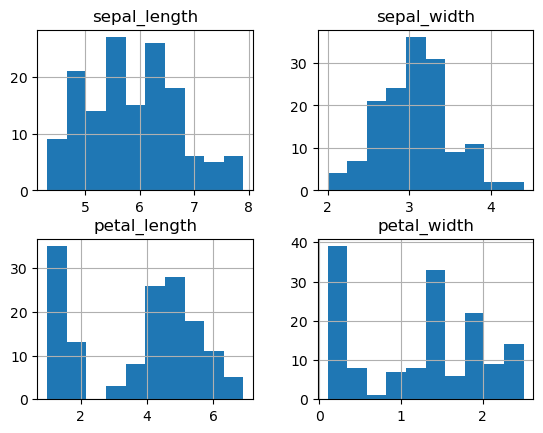

In [11]:
data.hist()
plt.show()

In [12]:
data['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

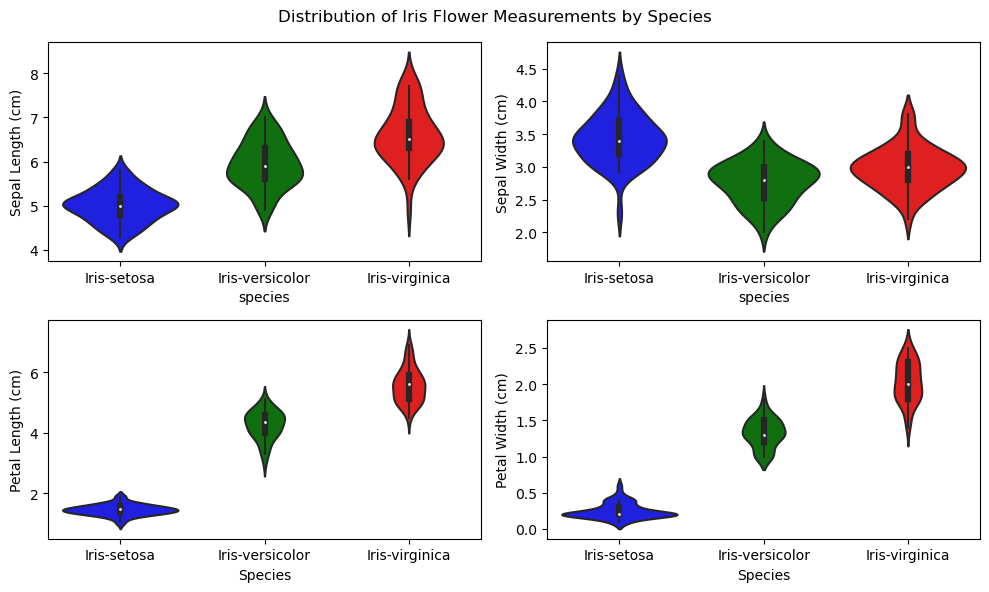

In [13]:
import matplotlib.pyplot as plt
from seaborn import violinplot

# Create the violin plot grid (2x2)
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # Adjust figsize for better visualization

# Define data for violin plots
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Loop through features and create violin plots on each subplot
for i, feature in enumerate(features):
    row = int(i / 2)
    col = i % 2
    violinplot(x="species", y=feature, showmeans=True, data=data, palette=["blue", "green", "red"], ax=axes[row, col])

# Set common labels and title for all subplots
fig.suptitle('Distribution of Iris Flower Measurements by Species', fontsize=12)
axes[0, 0].set_ylabel('Sepal Length (cm)')
axes[0, 1].set_ylabel('Sepal Width (cm)')
axes[1, 0].set_ylabel('Petal Length (cm)')
axes[1, 1].set_ylabel('Petal Width (cm)')
axes[1, 0].set_xlabel('Species')
axes[1, 1].set_xlabel('Species')

# Adjust layout (optional)
plt.tight_layout()

# Show plot
plt.show()


## Observations from the plots
Sepal length: Iris-setosa has the smallest median sepal length, followed by Iris-versicolor and then Iris-virginica. Iris-setosa also has the least variation in sepal length.

Sepal width:Similar to sepal length, Iris-setosa has the smallest median sepal width, while Iris-virginica has the largest. Iris-setosa again shows the least variation.

Petal length: Iris-virginica has the largest median petal length, followed by Iris-versicolor and Iris-setosa. Iris-virginica also has the most variation in petal length.

Petal width: Similar to petal length, Iris-virginica has the largest median petal width, followed by Iris-versicolor and Iris-setosa. Iris-virginica also has the most variation in petal width

## Key takeaways:
    
The violin plots show clear differences in the distribution of measurements (sepal and petal length/width) across the three Iris species.
Iris-setosa generally has the smallest median values and least variation in all four measurements.
Iris-virginica typically has the largest median values and most variation in all four measurements.
There is some overlap in the distributions of Iris-versicolor and Iris-virginica for all measurements.

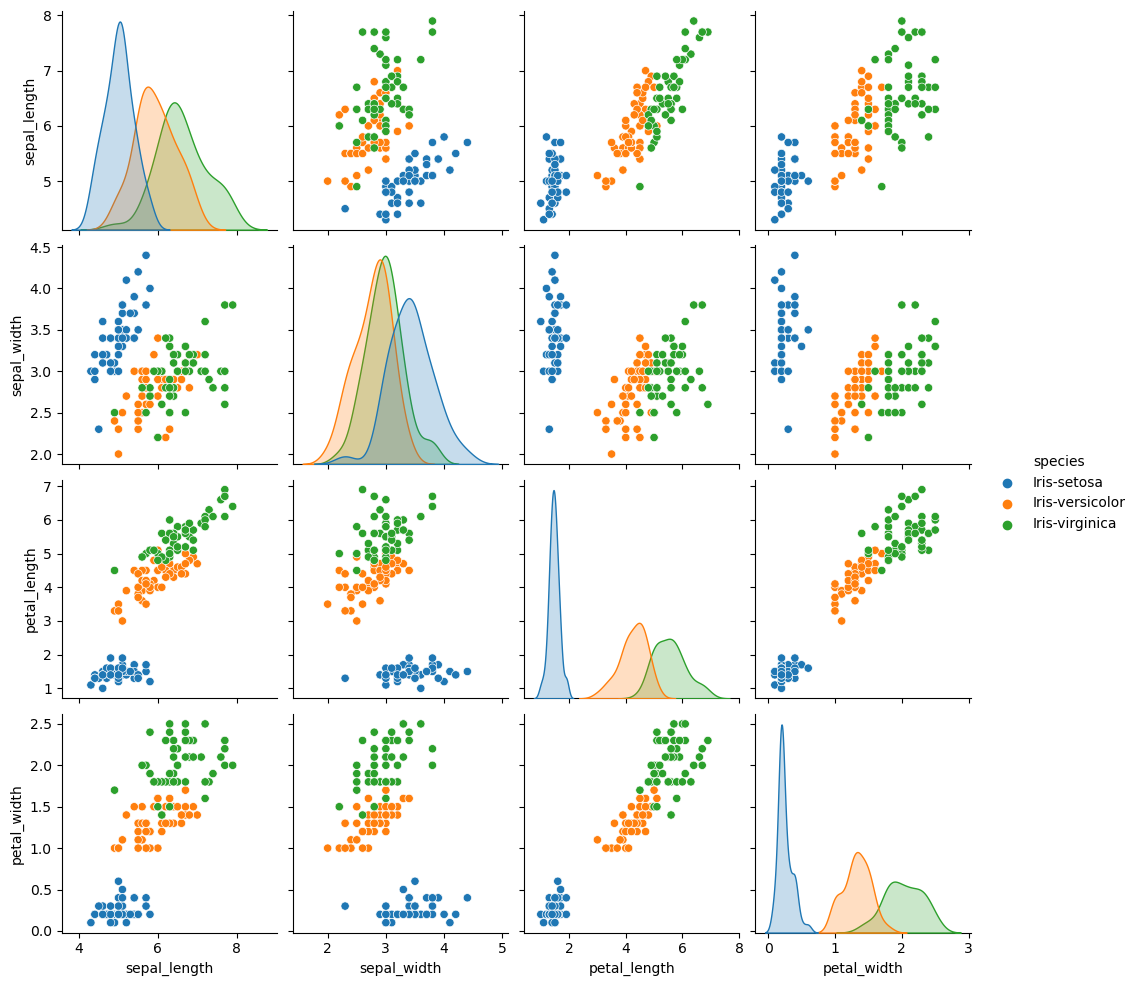

In [14]:
import seaborn as sns

sns.pairplot(data, hue="species")  # Color points by species
plt.show()


## Data Preprocessing

In [15]:
X = data.drop('species', axis=1)
y = data['species']

In [16]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Encoding species labels into integers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training


In [17]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Model Evaluation


In [18]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.9333333333333333
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



## Accuracy: 
0.9333333333333333: This indicates that the model correctly classified 93.33% of the iris flower samples

## precision:
This metric tells you how many of the samples the model predicted as a specific class (e.g., Iris-setosa) were actually that class. In this case:
For Iris-setosa, precision is 1.00, meaning all 11 samples predicted as Iris-setosa were indeed Iris-setosa.
For Iris-versicolor and Iris-virginica, precision is 0.90, indicating that 9 out of 10 samples were correctly classified for each species.

## Recall:
Recall for all three species is very high (around 0.90), meaning the model identified most of the actual flowers from each class correctly.

## Improvement:
While the overall accuracy is high, there might be room for improvement in specific classes (e.g., Iris-versicolor and Iris-virginica have slightly lower precision compared to Iris-setosa).

## Summary:
The provided results indicate a well-performing machine learning model for classifying Iris flower species. With an overall accuracy of 93.33%, the model achieved good precision, recall, and f1-scores for each class. This suggests the model can effectively distinguish between Iris-setosa, Iris-versicolor, and Iris-virginica based on their features. While there's room for improvement in some classes (e.g., Iris-versicolor and Iris-virginica precision), the overall performance is promising. It's important to consider the specific application and desired accuracy level for further interpretation.